In [10]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.array([0.8 ,1 ,1.3 ,1.9 ,2.3])
y = np.array([1.72, 2.35, 1.52, 2.43, 1.55])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
  alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
  l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
  mu[i] = h[i] / l[i]
  z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
for j in range(n - 2, -1, -1):
  c[j] = z[j] - mu[j] * c[j+1]
  b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
  d[j] = (c[j+1] - c[j]) / (3 * h[j])
for i in range(n):
  print(f"Відрізок {i+1}:")
  print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.72 + 4.5459(x - 0.8) + 0.0(x - 0.8)^2 + -34.8977(x - 0.8)^3, x належить [0.8, 1.0]
Відрізок 2:
S_1(x) = 2.35 + 0.3582(x - 1.0) + -20.9386(x - 1.0)^2 + 35.0747(x - 1.0)^3, x належить [1.0, 1.3]
Відрізок 3:
S_2(x) = 1.52 + -2.7348(x - 1.3) + 10.6287(x - 1.3)^2 + -5.9048(x - 1.3)^3, x належить [1.3, 1.9]
Відрізок 4:
S_3(x) = 2.43 + 0.0(x - 1.9) + 0.0(x - 1.9)^2 + 0.0(x - 1.9)^3, x належить [1.9, 2.3]


In [11]:
cs = CubicSpline(x, y)
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
print("Значення сплайна:")
for i in range(len(x_new)):
  print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")


Значення сплайна:
x = 0.80, y = 1.720
x = 0.82, y = 1.840
x = 0.83, y = 1.947
x = 0.85, y = 2.039
x = 0.86, y = 2.119
x = 0.88, y = 2.186
x = 0.89, y = 2.242
x = 0.91, y = 2.286
x = 0.92, y = 2.320
x = 0.94, y = 2.344
x = 0.95, y = 2.359
x = 0.97, y = 2.365
x = 0.98, y = 2.362
x = 1.00, y = 2.353
x = 1.01, y = 2.336
x = 1.03, y = 2.313
x = 1.04, y = 2.285
x = 1.06, y = 2.251
x = 1.07, y = 2.213
x = 1.09, y = 2.171
x = 1.10, y = 2.126
x = 1.12, y = 2.078
x = 1.13, y = 2.028
x = 1.15, y = 1.977
x = 1.16, y = 1.925
x = 1.18, y = 1.873
x = 1.19, y = 1.821
x = 1.21, y = 1.770
x = 1.22, y = 1.721
x = 1.24, y = 1.674
x = 1.25, y = 1.629
x = 1.27, y = 1.589
x = 1.28, y = 1.552
x = 1.30, y = 1.520
x = 1.32, y = 1.493
x = 1.33, y = 1.471
x = 1.35, y = 1.454
x = 1.36, y = 1.442
x = 1.38, y = 1.434
x = 1.39, y = 1.431
x = 1.41, y = 1.431
x = 1.42, y = 1.436
x = 1.44, y = 1.444
x = 1.45, y = 1.455
x = 1.47, y = 1.470
x = 1.48, y = 1.488
x = 1.50, y = 1.509
x = 1.51, y = 1.532
x = 1.53, y = 1.558
x 

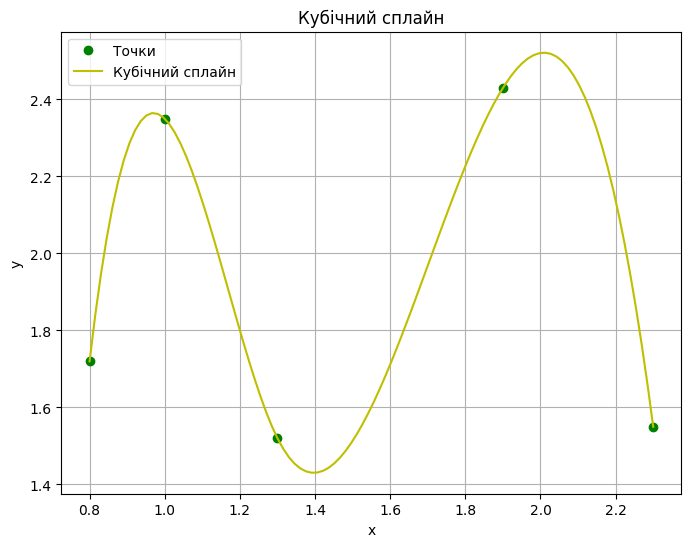

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки',color='g')
plt.plot(x_new, y_new, label='Кубічний сплайн',color='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()